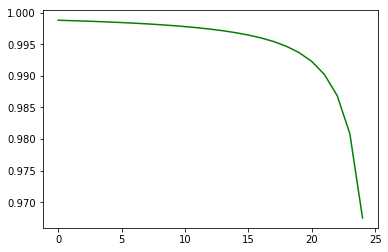

In [90]:
from random import seed
from random import randrange
import pandas as pd
import numpy as np
from csv import reader
from matplotlib import pyplot as plt


def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset


def str_column_to_float(dataset, column):
    for row in dataset:
        row[column]=float(row[column].strip())
        
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

def activate(row, theta):
    result=theta[0]
    for i in range (len(row)-1):
        result+=theta[i+1]*row[i]
        activation=1/(1+np.exp(-result))
    return activation

def accuracy_matriks(actual, predicted):
    correct=0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct+=1
    return correct/float(len(actual))*100.0

#prediction
def predict(row, theta):
    result=theta[0]
    for i in range (len(row)-1):
        result+=theta[i+1]*row[i]
        activation=1/(1+np.exp(-result))
    return 1.0 if activation>0.5 else 0.0 

#update weight


def cross_validation_split(data, n_folds):
    data_split=list()
    data_copy=list(data)
    fold_size=int(len(data) / n_folds)
    for i in range(n_folds):
        fold=list()
        while len(fold) < fold_size:
            index=randrange(0,len(data_copy))
            fold.append(data_copy.pop(index))
        data_split.append(fold)
    return data_split

def activate(row, theta):
    result=theta[0]
    for i in range (len(row)-1):
        result+=theta[i+1]*row[i]
        activation=1/(1+np.exp(-result))
    return activation

iris1 = load_csv('irisnew2.csv')

for i in range(len(iris1[0])-1):
    str_column_to_float(iris1, i)
    
str_column_to_int(iris1, len(iris1[0])-1)


alfa=0.1
n_folds=5
n_epoch=25

theta=[0.5, 0.5, 0.5, 0.5, 0.5]
dtheta=[0.0, 0.0, 0.0, 0.0, 0.0]
epnum=0
epoch2=list()
errorli=list()
skor=list()
errorli2=list()
for epoch in range(n_epoch):    
    epoch2.append(epnum)    
    for row in iris1:
        activation=activate(row, theta)
        error=(row[-1]-activation)**2
        dtheta[0]=2*(row[-1]-activation)*(1-activation)*activation
        theta[0]=theta[0] + alfa*dtheta[0]
        for i in range(len(row)-1):
            dtheta[i+1]=2*theta[i+1]*(row[-1]-activation)*(1-activation)*activation
            theta[i+1]=theta[i+1]+alfa*dtheta[i+1]
        
    folds = cross_validation_split(iris1, n_folds)
    scores=list()

    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predictions=list()
        for row in test_set:
            prediction=predict(row, theta)
            predictions.append(prediction)            
        actual = [row[-1] for row in fold]
        accuracy = accuracy_matriks(actual, predictions)
        scores.append(accuracy)
    meanacc=sum(scores)/float(len(scores))
    skor.append(meanacc)
    errorli.append(error)
    errorli2.append(errortest)
    epnum=epnum+1
    

plt.plot(epoch2, errorli, color='green')

plt.show()


    


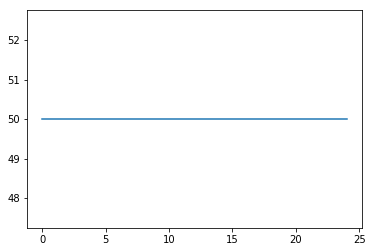

In [75]:
plt.plot(epoch2, skor)
plt.show()

1. Load data dengan mengkonversikan semua elemen menjadi integer/float, karena ada kolom yang tipe data string kita drop.
2. Implementasikan Single Layer Perceptron, dengan fungsi activate untuk rumus sigmoid, dan fungsi update theta untuk mengupdate theta terhadap dtheta, dan fungsi predict untuk prediction jika lebih dari 0.5 maka 1, jika tidak maka 0.
3. cross-validation dengan membagi data menjadi n_folds, setelah dibagi lalu diambil train_set dan test_set
4. Membuat fungsi akurasi matriks, yang mana jika predicted cocok dengan yang actual, maka variabel correct bertambah 1
5. Membuat fungsi perceptron, yakni menggunakan fungsi predict tadi untuk memprediksi, namun di sini objeknya ialah test_set tadi.
6. Membuat fungsi evaluasi, fungsi evaluasi digunakan untuk melihat score seberapa tinggi akurasi kita untuk memprediksi data
7. Fungsi str column to int dan float ialah mengubah semua tipe data sehingga tidak ada tipe data string
8. Membuat epoch
9. Memplotting data train dan test tersebut terhadap epochnya
10. link code https://github.com/mazmiaris/ML-Single-Layer-Perceptron/blob/master/Untitled3%20(1).ipynb